# Case Study: On-Farm Storage Capacity Analysis

In [124]:
#Import the modules required for the analysis
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import math

In [125]:
#Set the path
path = "/Users/yayincai/Documents/Job Hunting/Employer List/Indigo"
os.chdir(path)

In [126]:
#Read the data
parcels = gpd.read_file("parcels_ilmenard.shp")
bldg = gpd.read_file("silos_ilmenard.shp")

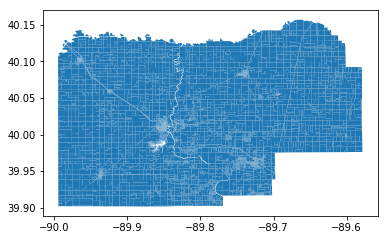

In [127]:
#Plot the parcels
parcels.plot()

In [190]:
#Have a look at the geodataframe of the parcels
parcels.head()

,OGC_FID,PARCELNUMB,PARCEL_NUM,ALTERNATE_,TOWNSHIP,TOWNSHIP_N,SITE_CSZ,GROSS_ACRE,HOMESITE_A,FARM_ACRES,...,COUNTY,GEOID,STATE,FID,PATH,ACRES,SQFT,geometry,OWNER_copy,muni
0,9999,U/I,None,None,None,None,None,NaN,NaN,NaN,...,menard,17129,il,9999,/us/il/menard/fancy-prairie-no-3/9999,0.04,1801.0,POLYGON ((-89.59984228998277 39.99621069681282...,,0
1,2998,U/I,None,None,None,None,None,NaN,NaN,NaN,...,menard,17129,il,2998,/us/il/menard/petersburg-east-no-13/2998,0.03,1478.0,POLYGON ((-89.83210357890695 39.99015144928946...,,0
2,6641,12-27-400-022,None,None,None,None,None,NaN,NaN,NaN,...,menard,17129,il,6641,/us/il/menard/athens-north-no-2/6641,2.17,94653.0,POLYGON ((-89.75191577222456 39.98237372238361...,,0
3,8338,11-14-218-005,None,None,None,None,None,NaN,NaN,NaN,...,menard,17129,il,8338,/us/il/menard/petersburg-north-no-14/8338,0.01,588.0,"POLYGON ((-89.85153763818347 40.0179303771223,...",,0
4,2440,11-23-201-064,1123201064,None,11,T18N R7W,None,1.14,1.14,0.0,...,menard,17129,il,2440,/us/il/menard/petersburg-south-no-15/2440,1.14,49481.0,POLYGON ((-89.84594642998294 39.99943392351625...,GRAND OAKS ESTATES HOMEOWNERS ASSOCIATON INC,0


In [129]:
#See the columns of the parcels
parcels.columns

Index(['OGC_FID', 'PARCELNUMB', 'PARCEL_NUM', 'ALTERNATE_', 'TOWNSHIP',
       'TOWNSHIP_N', 'SITE_CSZ', 'GROSS_ACRE', 'HOMESITE_A', 'FARM_ACRES',
       'LASS', 'TAX_STATUS', 'LOT_DIMENS', 'OWNER1_ID', 'DOCUMENT_N',
       'OWNER1_ADD', 'OWNER1__01', 'OWNER1_CSZ', 'OWNER2_ID', 'DOCUMEN_01',
       'OWNER2_ADD', 'OWNER2__01', 'OWNER2_CSZ', 'LEGAL', 'DATE_OF_SA',
       'MAILTO_NAM', 'MAILTO__01', 'MAILTO_ADD', 'HEL_FLAG', 'MAILTO_CSZ',
       'HIS_FLAG', 'HIE_FLAG', 'HES_FLAG', 'HEP_FLAG', 'FAF_FLAG', 'VEZ_FLAG',
       'VET_FLAG', 'XMPT_FLAG', 'SAF_FLAG', 'DRN_FLAG', 'ASSESSED_L',
       'FARM_LAND', 'FARM_BUILD', 'NON_FARM_L', 'NON_FARM_B', 'TAX_BILLED',
       'TAX_CODE', 'CURRENT_AS', 'CURRENT_01', 'PY_NON_FAR', 'PY_NON__01',
       'PY_FARM_LA', 'PY_FARM_BL', 'TAXBILL_NA', 'TAXBILL_01', 'TAXBILL_AD',
       'TAXBILL_CS', 'TAXBILL_YE', 'TAXBILL_RA', 'TAXBILL_TA', 'INSTALL_1_',
       'INSTALL_01', 'INSTALL_2_', 'PRIOR_TAXB', 'PRIOR_T_01', 'PRIOR_T_02',
       'OWNER1_DOC', 'OWNER2_

In [130]:
#See the columns of the bldg
bldg.columns

Index(['DIAMETER', 'geometry'], dtype='object')

In [136]:
# Check if a string contains municipal info
def isMuni(string):
    if len(string)==0:
        return 0
    else:
        stringlst = string.split(" ")
        if ("INC" in stringlst) or ("CO" in stringlst) or ("CORP" in stringlst) or ("LLC" in stringlst) or ("LTD" in stringlst) or ("COMPANY" in stringlst):
            return 0
        elif "CITY" in stringlst:
            return 1
        elif "COUNTY" in stringlst:
            return 1
        elif "STATE" in stringlst:
            return 1
        elif "DEPT" in stringlst:
            return 1
        elif "BUREAU" in stringlst:
            return 1
        else:
            return 0

In [137]:
# Check if the owner of the parcel is municipal organization
def checkMuni(df):
    df["OWNER"] = df["OWNER"].fillna("")
    df["OWNER_copy"] = df["OWNER"]
    df["muni"] = df["OWNER"].apply(lambda x: isMuni(x))

In [138]:
checkMuni(parcels)

In [139]:
parcels.head()

,OGC_FID,PARCELNUMB,PARCEL_NUM,ALTERNATE_,TOWNSHIP,TOWNSHIP_N,SITE_CSZ,GROSS_ACRE,HOMESITE_A,FARM_ACRES,...,COUNTY,GEOID,STATE,FID,PATH,ACRES,SQFT,geometry,OWNER_copy,muni
0,9999,U/I,None,None,None,None,None,NaN,NaN,NaN,...,menard,17129,il,9999,/us/il/menard/fancy-prairie-no-3/9999,0.04,1801.0,POLYGON ((-89.59984228998277 39.99621069681282...,,0
1,2998,U/I,None,None,None,None,None,NaN,NaN,NaN,...,menard,17129,il,2998,/us/il/menard/petersburg-east-no-13/2998,0.03,1478.0,POLYGON ((-89.83210357890695 39.99015144928946...,,0
2,6641,12-27-400-022,None,None,None,None,None,NaN,NaN,NaN,...,menard,17129,il,6641,/us/il/menard/athens-north-no-2/6641,2.17,94653.0,POLYGON ((-89.75191577222456 39.98237372238361...,,0
3,8338,11-14-218-005,None,None,None,None,None,NaN,NaN,NaN,...,menard,17129,il,8338,/us/il/menard/petersburg-north-no-14/8338,0.01,588.0,"POLYGON ((-89.85153763818347 40.0179303771223,...",,0
4,2440,11-23-201-064,1123201064,None,11,T18N R7W,None,1.14,1.14,0.0,...,menard,17129,il,2440,/us/il/menard/petersburg-south-no-15/2440,1.14,49481.0,POLYGON ((-89.84594642998294 39.99943392351625...,GRAND OAKS ESTATES HOMEOWNERS ASSOCIATON INC,0


In [141]:
# Check which are municipal parcels
parcels[parcels["muni"]==1].OWNER.unique()

array(['CITY OF PETERSBURG', 'MENARD COUNTY', 'ATHENS STATE BANK',
       'MENARD COUNTY HIGHWAY DEPT', 'MENARD COUNTY CEMETERY',
       'STATE OF ILLINOIS', 'COUNTY ESTATES I LP ATTN: ANNE R SMITH',
       'MENARD COUNTY HOUSING AUTHORITY', 'MENARD COUNTY AS TRUSTEE',
       'MENARD COUNTY RESCUE SQUAD', 'CITY OF ATHENS',
       'MENARD COUNTY ROAD DISTRICT #4', 'MENARD COUNTY ROAD DISTRICT 9',
       'COUNTY OF MENARD', 'MIDDLETOWN STATE BANK',
       'PARKSIDE HOMES LP C/O MENARD COUNTY HOUSING AUTHORITY',
       'MENARD COUNTY VFW POST 6871', 'MENARD COUNTY FARM BUREAU',
       'MENARD COUNTY ROAD DISTRICT #5 %JERRY TICE',
       'MENARD COUNTY THE PEOPLE OF',
       'MENARD COUNTY MENARD COUNTY HIGHWAY DEPT',
       'MENARD COUNTY PUBLIC BUILDING COMMISSION',
       'CITY OF PETERSBURG TRUSTEES', 'ROAD DISTRICT #2 MENARD COUNTY',
       'ATHENS STATE BANK ATN: RICHARD DENNIS', 'CITY PARK COUNTY',
       'ROAD DISTRICT #3 MENARD COUNTY C/O GLENN SIMMERING',
       'COUNTY ESTATES I

In [142]:
#Remove the buildings in the municipal parcels
def removeMuni(bldg, parcels):
    #Add an unique ID to the buildings
    bldg["UID"] = bldg.index
    #Spatial join the buildings and the parcels
    bldg2 = gpd.sjoin(bldg, parcels, how="inner", op='intersects')
    bldg2 = bldg2[["UID","muni"]]
    #Check if any part of the building located on the municipal parcel
    bldgunique = bldg2.groupby("UID").agg({"muni":"max"})
    bldgunique.reset_index(inplace=True)
    #Join the municipal info to the original geodataframe
    bldg = bldg.merge(bldgunique,on="UID")
    bldg["muni"] = bldg["muni"].fillna(0)
    bldg = bldg[bldg["muni"]==0]
    bldg.drop(["muni"],axis=1,inplace=True)
    return bldg

In [143]:
len(bldg)

617

In [147]:
#Remove the buildings located on municipal parcels
grainbins = removeMuni(bldg, parcels)

In [148]:
#We can see that no building is located on the municipal parcels
len(grainbins)

617

In [149]:
grainbins.head()

,DIAMETER,geometry,UID
0,5.970181,"POLYGON ((-89.761038140355 40.11017998598363, ...",0
1,5.782834,"POLYGON ((-89.7610309374848 40.110121105254, -...",1
2,4.725118,"POLYGON ((-89.76101939039121 40.1101153080984,...",2
3,10.958176,"POLYGON ((-89.7645452732458 40.11338562571487,...",3
4,8.454480,"POLYGON ((-89.7647079257188 40.11342932677454,...",4


In [150]:
#Select out the agricultural parcels based on the farm land area
def selectAgri(df):
    df1 = df[df["FARM_ACRES"]>0]
    return df1

In [151]:
agriparcels = selectAgri(parcels)

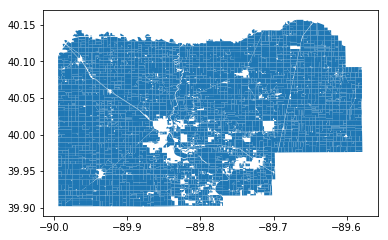

In [152]:
agriparcels.plot()

In [153]:
len(agriparcels)

4578

In [154]:
# Define the functions to calculate the radius, area, volume, and # of bushels
# Reference: 
# https://www.brockmfg.com/uploads/pdf/BR_2286_201702_Brock_Non_Stiffened_Storage_Capacities_Fact_Sheet_EM.pdf
# https://cropwatch.unl.edu/how-estimate-bushels-round-grain-bin

def calRadius(df):
    #Calculate radius in feet
    df["radius"] = (df["DIAMETER"]*3.28084)/2

def calArea(df):
    #Calculate the bottom area of the grain bins
    df["area"] = math.pi*df["radius"]*df["radius"]
    
def calVolume(df, height):
    #Calculate the volume of the grain bins
    df["volume_"+str(height)] = df["area"]*height
    
def calBushels(df, height):
    #Calculate the maximum # of bushels in the grain bins
    df["bushels_"+str(height)] = df["volume_" + str(height)]*0.85

In [155]:
#Calculate the radius and the area of the grain bins
calRadius(grainbins)
calArea(grainbins)

In [156]:
grainbins.head()

,DIAMETER,geometry,UID,radius,area
0,5.970181,"POLYGON ((-89.761038140355 40.11017998598363, ...",0,9.793605,301.324889
1,5.782834,"POLYGON ((-89.7610309374848 40.110121105254, -...",1,9.486277,282.710218
2,4.725118,"POLYGON ((-89.76101939039121 40.1101153080984,...",2,7.751178,188.749299
3,10.958176,"POLYGON ((-89.7645452732458 40.11338562571487,...",3,17.976011,1015.164693
4,8.454480,"POLYGON ((-89.7647079257188 40.11342932677454,...",4,13.868899,604.273886


In [157]:
#Check if any agricultural parcel doesn't have the owner
len(agriparcels[agriparcels["OWNER"] == ""])

0

In [158]:
#Dissolve the parcels by owner name
agriparcels_byowners = agriparcels.dissolve(by='OWNER')

In [159]:
len(agriparcels_byowners)

1645

In [162]:
# Seperate the dissolved parcels if they are not adjacent
# Reference code: https://github.com/geopandas/geopandas/issues/369
def multi2single(gpdf):
    gpdf_singlepoly = gpdf[gpdf.geometry.type == 'Polygon']
    gpdf_multipoly = gpdf[gpdf.geometry.type == 'MultiPolygon']

    for i, row in gpdf_multipoly.iterrows():
        Series_geometries = pd.Series(row.geometry)
        df = pd.concat([gpd.GeoDataFrame(row, crs=gpdf_multipoly.crs).T]*len(Series_geometries), ignore_index=True)
        df['geometry']  = Series_geometries
        gpdf_singlepoly = pd.concat([gpdf_singlepoly, df])

    gpdf_singlepoly.reset_index(inplace=True, drop=True)
    return gpdf_singlepoly

In [173]:
agriparcels_byowners_explode = multi2single(agriparcels_byowners)
len(agriparcels_byowners_explode)

2367

In [174]:
#Reset the index to make each row have a unique id
agriparcels_byowners_explode.reset_index(inplace=True)
agriparcels_byowners_explode.head()

,index,geometry,OGC_FID,PARCELNUMB,PARCEL_NUM,ALTERNATE_,TOWNSHIP,TOWNSHIP_N,SITE_CSZ,GROSS_ACRE,...,CITY,COUNTY,GEOID,STATE,FID,PATH,ACRES,SQFT,OWNER_copy,muni
0,0,POLYGON ((-89.75018777276109 39.91643295168886...,967,17-15-400-012,1715400012,None,17,T17N R6W,None,10.3,...,athens-south-no-1,menard,17129,il,967,/us/il/menard/athens-south-no-1/967,10.31,448937,ABBOTT JERRY D & NANCY R,0
1,1,POLYGON ((-89.73308439735889 39.93819936195659...,7948,17-12-100-004,1712100004,None,17,T17N R6W,ATHENS IL 62613,25.55,...,athens-south-no-1,menard,17129,il,7948,/us/il/menard/athens-south-no-1/7948,25.57,1.11388e+06,ABELN BOBBY J,0
2,2,POLYGON ((-89.73308439735889 39.93819936195659...,947,17-11-400-009,1711400009,None,17,T17N R6W,None,0.6,...,athens-south-no-1,menard,17129,il,947,/us/il/menard/athens-south-no-1/947,0.6,26058,ABELN DIRK E,0
3,3,POLYGON ((-89.76445738612718 39.95739794372912...,10917,17-03-101-015,1703101015,None,17,T17N R6W,ATHENS IL 62613,13.856,...,athens-south-no-1,menard,17129,il,10917,/us/il/menard/athens-south-no-1/10917,13.43,585072,ADAMSKI DONALD JR & DEWANA,0
4,4,"POLYGON ((-89.7720171940997 39.9170961603952, ...",9988,17-21-200-006,1721200006,None,17,T17N R6W,PETERSBURG IL 62675,56.58,...,rock-creek-no-12,menard,17129,il,9988,/us/il/menard/rock-creek-no-12/9988,56.62,2.46634e+06,ADAMSKI ERIC W & GAIL A FAMILY TRUST,0


In [175]:
#Spatial join the parcels and grain bins to find the parcels which intersect with one or more bins
parcels_bins = gpd.sjoin(agriparcels_byowners_explode, grainbins, how="inner", op='intersects')

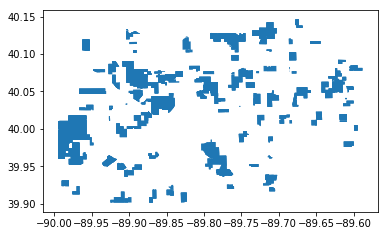

In [176]:
parcels_bins.plot()

In [177]:
parcels_bins.head()
len(parcels_bins)

574

In [178]:
#Calculate the total bottom areas of the grain bins in a parcel
parcels_bins_sum = parcels_bins.groupby("index").agg({"area":"sum"})

In [179]:
#How many parcels have at least one bin?
len(parcels_bins_sum)

135

In [180]:
parcels_bins_sum.head()

,area
index,
34,722.940891
57,1974.727926
76,1327.060989
98,4443.301657
133,2299.318857


In [181]:
#Assume that the height of the grain bins varies from 15ft to 54ft
#Reference: https://www.brockmfg.com/uploads/pdf/BR_2286_201702_Brock_Non_Stiffened_Storage_Capacities_Fact_Sheet_EM.pdf
parcels_bins_sum.reset_index(inplace=True)
calVolume(parcels_bins_sum,15)
calVolume(parcels_bins_sum,54)
calBushels(parcels_bins_sum,15)
calBushels(parcels_bins_sum,54)

In [182]:
parcels_bins_sum.head()

,index,area,volume_15,volume_54,bushels_15,bushels_54
0,34,722.940891,10844.113361,39038.808100,9217.496357,33182.986885
1,57,1974.727926,29620.918890,106635.308005,25177.781057,90640.011804
2,76,1327.060989,19905.914840,71661.293424,16920.027614,60912.099411
3,98,4443.301657,66649.524854,239938.289474,56652.096126,203947.546053
4,133,2299.318857,34489.782848,124163.218253,29316.315421,105538.735515


In [183]:
#Add the capacity info
parcels_bins = parcels_bins.merge(parcels_bins_sum,on="index")

In [184]:
#Plot the map
def plotMap(geodf, figwidth, figheight, column):
    vmin, vmax = geodf[column].min(),geodf[column].max()
    fig, ax = plt.subplots(1, figsize=(figwidth, figheight))
    geodf.plot(column=column, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)

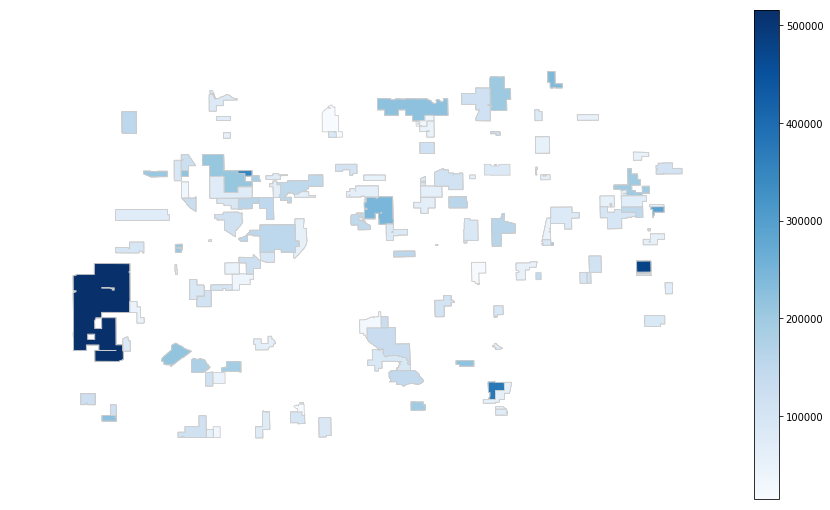

In [185]:
plotMap(parcels_bins, 15, 9, "bushels_54")

In [642]:
#Save to geojson files, which will be used in the data visualization part
parcels_bins.to_file("parcels_bins.geojson",driver="GeoJSON")
agriparcels_byowners_explode.to_file("parcels_agri.geojson",driver="GeoJSON")
grainbins.to_file("grainbins.geojson",driver="GeoJSON")